In [ ]:
from sklearn.ensemble import RandomForestClassifier
emp=RandomForestClassifier(n_estimators=10)

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("/content/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [ ]:
feature_cols=['Age','JobSatisfaction']
features=df[feature_cols]
features

,Age,JobSatisfaction
0,41,4
1,49,2
2,37,3
3,33,3
4,27,2
...,...,...
1465,36,4
1466,39,1
1467,27,2
1468,49,2


In [ ]:
target=df.Attrition

In [ ]:
emp.fit(features,target)

RandomForestClassifier(n_estimators=10)

In [ ]:
emp.predict([[41,4]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['No'], dtype=object)

In [ ]:
Age=int(input("enter age:"))
sats=int(input("enter job satisfaction rate:"))
pred=emp.predict([[Age,sats]])
if pred=='yes':
  print("attrition")
else:
  print("no attrition")

enter age:4
enter job satisfaction rate:41
no attrition


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
#saving the all decision trees
import os
output_dir="tree_visualizations"
os.makedirs(output_dir,exist_ok=True)

In [ ]:
for i,tree in enumerate(emp.estimators_):
  tree_dot_file=os.path.join(output_dir,f"tree_{i}.dot")
  tree_png_file=os.path.join(output_dir,f"tree_{i}.png")

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file=tree_dot_file, feature_names=["Age","JobSatisfaction"],
                    class_names=[str(cls) for cls in emp.classes_], filled=True,rounded=True)

In [ ]:
command=f"dot -Tpng {tree_dot_file} -o {tree_png_file}"
os.system(command)
print(f"Tree {i} visualization saved to {tree_png_file}")

Tree 9 visualization saved to tree_visualizations/tree_9.png


In [ ]:
#load libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df1=pd.read_csv("/content/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df1

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [ ]:
feature_cols=['Age','JobSatisfaction']
features1=df1[feature_cols]
features1

,Age,JobSatisfaction
0,41,4
1,49,2
2,37,3
3,33,3
4,27,2
...,...,...
1465,36,4
1466,39,1
1467,27,2
1468,49,2


In [ ]:
target1=df1.Attrition

In [ ]:
#create the model
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [ ]:
model.fit(features1,target1)

DecisionTreeClassifier()

In [ ]:
Age=int(input("enter age:"))
sats=int(input("enter job satisfaction rate:"))
pred=model.predict([[Age,sats]])
if pred=='yes':
  print("attrition")
else:
  print("no attrition")

enter age:41
enter job satisfaction rate:4
no attrition


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.tree import export_graphviz,plot_tree

[Text(0.4179391571969697, 0.9642857142857143, 'x[0] <= 33.5\ngini = 0.27\nsamples = 1470\nvalue = [1233, 237]'),
 Text(0.1883877840909091, 0.8928571428571429, 'x[0] <= 21.5\ngini = 0.371\nsamples = 574\nvalue = [433, 141]'),
 Text(0.06542699724517906, 0.8214285714285714, 'x[1] <= 2.5\ngini = 0.497\nsamples = 41\nvalue = [19, 22]'),
 Text(0.030303030303030304, 0.75, 'x[0] <= 18.5\ngini = 0.469\nsamples = 16\nvalue = [6, 10]'),
 Text(0.024793388429752067, 0.6785714285714286, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.03581267217630854, 0.6785714285714286, 'x[0] <= 20.5\ngini = 0.48\nsamples = 15\nvalue = [6, 9]'),
 Text(0.02203856749311295, 0.6071428571428571, 'x[1] <= 1.5\ngini = 0.494\nsamples = 9\nvalue = [4, 5]'),
 Text(0.011019283746556474, 0.5357142857142857, 'x[0] <= 19.5\ngini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(0.005509641873278237, 0.4642857142857143, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.01652892561983471, 0.4642857142857143, 'gini = 0.444\nsamp

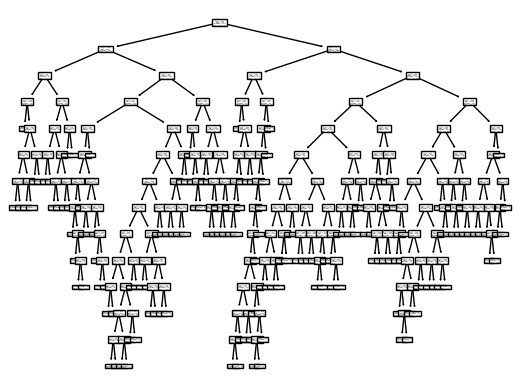

In [ ]:
plot_tree(model)   #plot_tree(trained modelname)